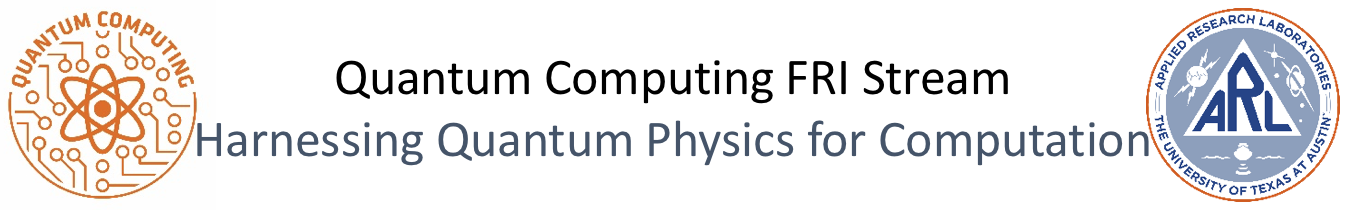

#### Most Recent Lesson: Lesson03 - Quantum Computing Basics

### Installations and Imports

In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet

     |████████████████████████████████| 6.7 MB 33.3 MB/s 
     |████████████████████████████████| 18.0 MB 262 kB/s 
     |████████████████████████████████| 240 kB 83.6 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 67.7 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 1.6 MB 63.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 79.6 MB/s 
     |████████████████████████████████| 4.0 MB 89.2 MB/s 
     |████████████████████████████████| 112 kB 79.6 MB/s 


In [ ]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     |████████████████████████████████| 162 kB 15.4 MB/s 


In [ ]:
from qiskit.quantum_info.operators.symplectic import random
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np


# <font color=green>Homework - Deutsch-Jozsa Algorithm</font>


Implement the Deutsch-Jozsa algorithm as follows:
 - Given "n" qubits, pick a value of "a" at random
 - Initialize an (n+1)-qubit state
 - Apply the appropriate gates
 - Measure the input register
 - Determine whether the function is constant or balanced
 - Comment on the significance of the input register's value

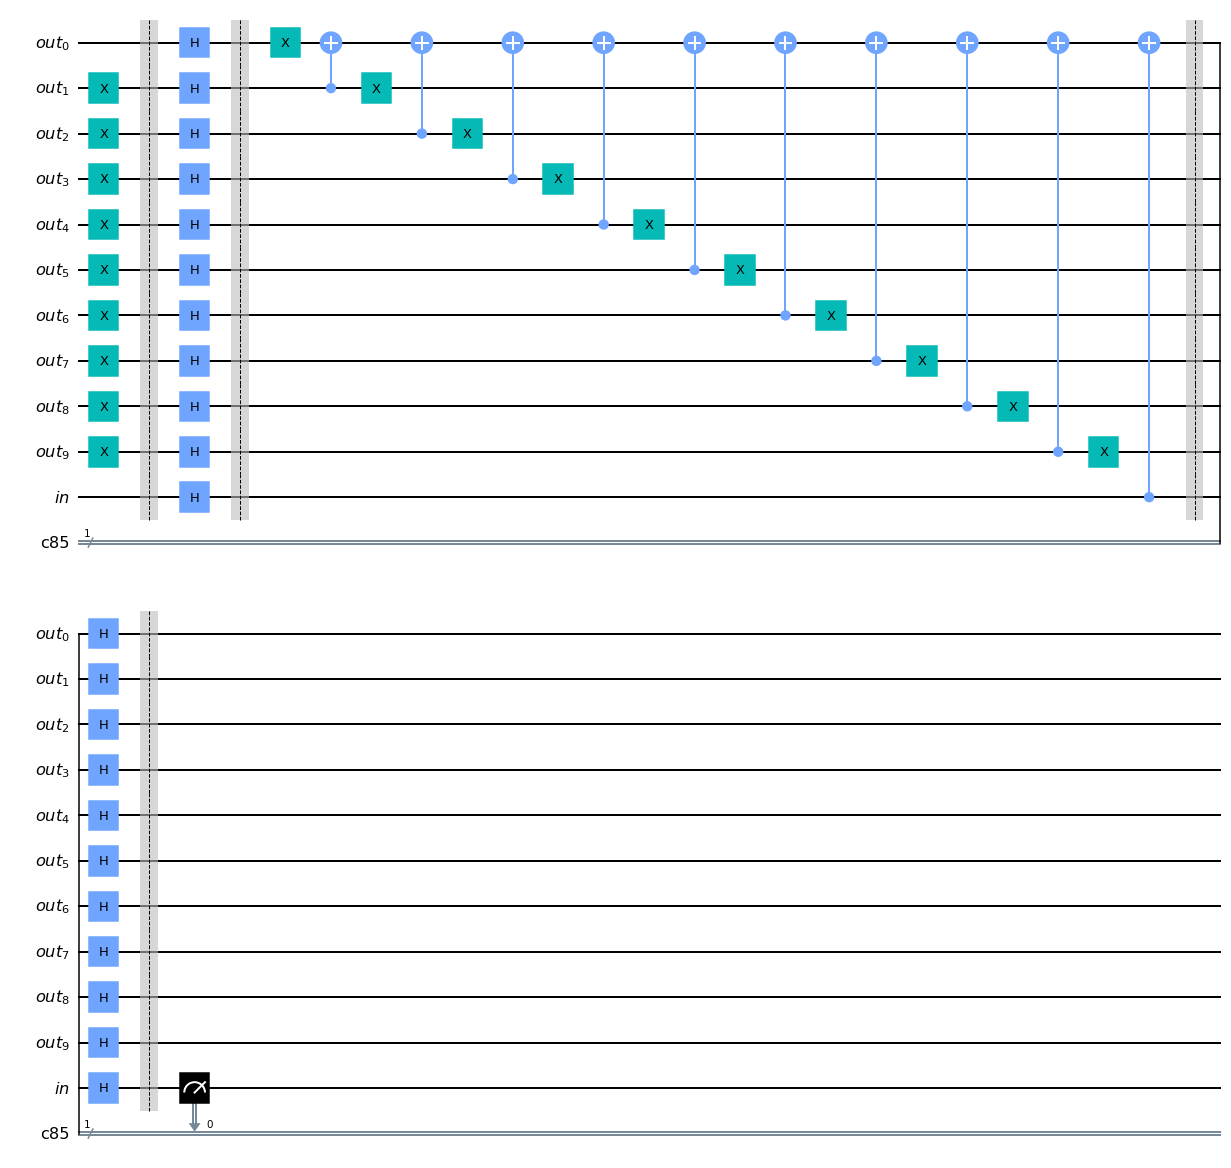

In [153]:
n = 10
inp = QuantumRegister(1, 'in')
out = QuantumRegister(n, 'out')
q = QuantumRegister(n+1)
c = ClassicalRegister(1)
qc = QuantumCircuit(out, inp, c)

for a in range(n): #generates random a
  r = np.random.rand()
  if np.round(r) == 1.0:
    qc.x(a)

qc.barrier()

#Apply Hadamard
qc.h(out)
qc.h(inp)

qc.barrier()

#Apply Unitary
for k in range(n):
  qc.x(k)
  qc.cx(k+1,0)
qc.barrier()

#Apply Hadamard
qc.h(out)
qc.h(inp)
qc.barrier()

#Measure input register
qc.measure(inp, c)

qc.draw('mpl')


In [150]:
backend = Aer.get_backend('qasm_simulator')

In [154]:
job = execute(qc, backend, shots=1024)
result = job.result()
counts=result.get_counts(qc)
print(counts)

{'0': 1024}


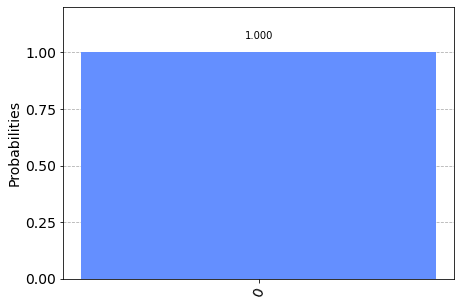

In [155]:
plot_histogram(counts)

In [ ]:
#If input register is 0 then the function is constant. If it is 1, then it's balanced.